### Econometrics3
### Regression Discontinuity Design (RDD); Causal inference & identification strategies; Electoral gender representation analysis; Robustness checks & assumption validation
### Mingshu Li

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
from graphviz import Digraph

### Problem1.1

In [39]:
# causal graph
dot = Digraph()

# Nodes
dot.node("A", "Female Mayor Elected")
dot.node("B", "Voter Bias")
dot.node("C", "Rank of Female Candidates")
dot.node("D", "Female Representation in Neighboring Municipalities")

# Edges
dot.edge("A", "B")  # Female mayor reduces voter bias
dot.edge("B", "C")  # Reduction in voter bias improves female rank improvement
dot.edge("A", "C")  # Female mayor directly improves female candidate performance
dot.edge("A", "D")  # Female mayor influences neighboring municipalities
dot.edge("D", "C")
# Render the graph
dot.render("updated_causal_graph", format="png", cleanup=True)

'updated_causal_graph.png'

### Problem 1.2

In [42]:
df = pd.read_csv('ps4_data.csv')


columns_of_interest = [
    "female",
    "rdd_sample",
    "margin_1",  
    "margin_2",  
    "female_mayor",  
    "gewinn_norm", 
    "wahlbet", 
    "inter_1", 
    "inter_2", 
]

df = df.dropna(subset=['rdd_sample'])

df = df[df['female'] == 1]

df = df[columns_of_interest]

summary = df.describe()

print("Summary of Relevant Variables:")
print(summary)

Summary of Relevant Variables:
       female  rdd_sample     margin_1     margin_2  female_mayor  \
count  6472.0      6472.0  6472.000000  6472.000000   6472.000000   
mean      1.0         1.0    -9.797605   876.216837      0.402040   
std       0.0         0.0    27.934644  1036.176946      0.490348   
min       1.0         1.0   -74.100000     0.090000      0.000000   
25%       1.0         1.0   -33.700000    72.250000      0.000000   
50%       1.0         1.0    -7.300000   515.290040      0.000000   
75%       1.0         1.0     9.100000  1303.209800      1.000000   
max       1.0         1.0    65.100000  5490.809600      1.000000   

       gewinn_norm      wahlbet      inter_1      inter_2  
count  6472.000000  6472.000000  6472.000000  6472.000000  
mean      0.106067    50.023887     7.262036   208.745824  
std      11.495141     6.106213    12.491307   509.053290  
min     -65.217390    36.799999     0.000000     0.000000  
25%      -5.263158    45.900000     0.000000   

### Problem 1.3

$Rank Improvement$ = ${\beta}_0$ + ${\beta}_1 Voting Margin$ + ${\beta}_2$ $Voting Margin^2$ + ${\beta}_3 Female Mayor$

$+$ ${\beta}_4 Voting Margin \times Female Mayor$ + ${\beta}_5 Voting Margin^2 \times Female Mayor$ + $\varepsilon$

### Problem 1.4

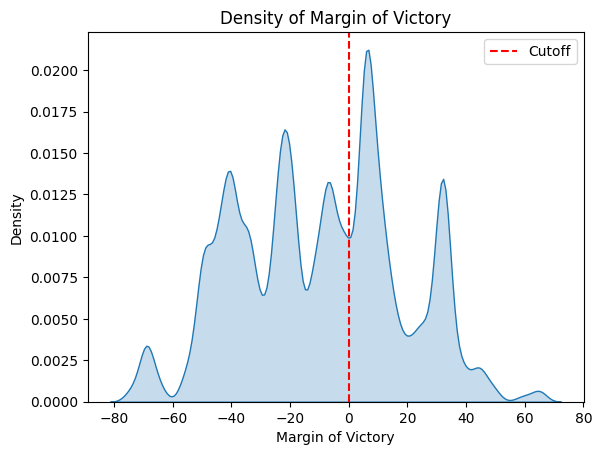

In [49]:
# Density plot for margin_1
sns.kdeplot(df['margin_1'], fill=True, bw_adjust=0.5)
plt.axvline(x=0, color='red', linestyle='--', label='Cutoff')
plt.title("Density of Margin of Victory")
plt.xlabel("Margin of Victory")
plt.ylabel("Density")
plt.legend()
plt.show()

### Problem 1.5

In [52]:
sharp_rdd_model = smf.ols(
    "gewinn_norm ~ -1 + margin_1 + margin_2 + female_mayor + inter_1 + inter_2", data=df
).fit(cov_type="HC3")

print(sharp_rdd_model.summary())

                                 OLS Regression Results                                
Dep. Variable:            gewinn_norm   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              6.165
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                    1.04e-05
Time:                        18:07:20   Log-Likelihood:                         -24975.
No. Observations:                6472   AIC:                                  4.996e+04
Df Residuals:                    6467   BIC:                                  4.999e+04
Df Model:                           5                                                  
Covariance Type:                  HC3                                                  
                   coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

In [54]:
def kweight(x):
    w = 1 - np.abs(x/20) #using kernel weights and a bandwidth of 20.
    w = np.maximum(0,w)
    return w
m2 = smf.wls('gewinn_norm ~ margin_1*female_mayor', df, 
weights = kweight(df['margin_1'])).fit()
print(m2.summary())

                            WLS Regression Results                            
Dep. Variable:            gewinn_norm   R-squared:                       0.011
Model:                            WLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     24.83
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           5.71e-16
Time:                        18:07:30   Log-Likelihood:                   -inf
No. Observations:                6472   AIC:                               inf
Df Residuals:                    6468   BIC:                               inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.03

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:809: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


### Problem 1.6

In [57]:
m3 = smf.wls('gewinn_norm ~ margin_1*female_mayor + wahlbet', df, 
weights = kweight(df['margin_1'])).fit()
print(m3.summary())

                            WLS Regression Results                            
Dep. Variable:            gewinn_norm   R-squared:                       0.013
Model:                            WLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     21.38
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           1.53e-17
Time:                        18:07:48   Log-Likelihood:                   -inf
No. Observations:                6472   AIC:                               inf
Df Residuals:                    6467   BIC:                               inf
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.84

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:809: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))
